Sources:
* http://www.irrationalexuberance.com/index.htm

In [1]:
%matplotlib inline
from matplotlib.pyplot import *

import numpy as np
import scipy as sp
import pandas as pd

from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

In [2]:
data = pd.read_csv('data.csv')

data['nominal'] = data['nominal'] / data['nominal'].values[0] * 100
data.head()

,time,real,nominal
0,1890.0,100.000000,100.000000
1,1891.0,88.011791,90.212072
2,1892.0,95.421736,91.843393
3,1893.0,92.297385,95.758564
4,1894.0,123.980483,111.582382


In [3]:
# Add trend lines

indexes = (data.time >= 1945) & (data.time <= 1999)

X1 = np.hstack([
    data[indexes].time.values[:, None],
    np.ones((len(data[indexes]), 1))
])
X2 = np.hstack([
    data.time.values[:, None],
    np.ones((len(data), 1))
])
indexes3 = (data.time >= 1933)
X3 = np.hstack([
    data[indexes3].time.values[:, None],
    np.ones((len(data[indexes3]), 1))
])

w = np.linalg.lstsq(X1, np.log(data[indexes].real.values))[0]
data['real_trend'] = np.exp(np.dot(X2, w))

w = np.linalg.lstsq(X1, np.log(data[indexes].nominal.values))[0]
data.loc[indexes3, 'nominal_trend'] = np.exp(np.dot(X3, w))

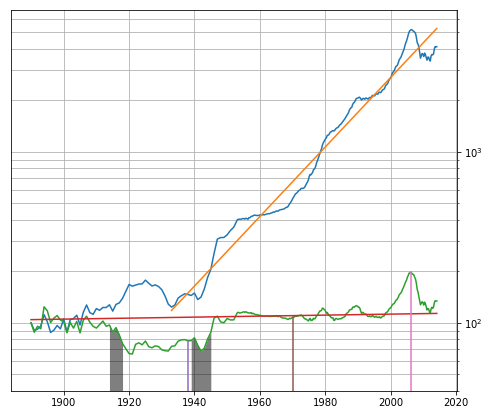

In [29]:
figure(figsize=(8, 7))
bottom = 40

semilogy(data.time, data.nominal)
semilogy(data.time, data.nominal_trend)

semilogy(data.time, data.real)
semilogy(data.time, data.real_trend)

# World war 1
indexes = (data.time >=1914) & (data.time <= 1918)
fill_between(data[indexes].time, bottom, data[indexes].real, linewidth=0, color='k', alpha=0.5)

# World war 2
indexes = (data.time >=1939) & (data.time <= 1945)
fill_between(data[indexes].time, bottom, data[indexes].real, linewidth=0, color='k', alpha=0.5)

# Fannie Mae
x = 1938
plot([x, x], [bottom, data[data.time==x].real])

# Freddie Mac
x = 1970.125
plot([x, x], [bottom, data[data.time==x].real])

# Freddie Mac
x = 2006.125
plot([x, x], [bottom, data[data.time==x].real])


ax = gca()

grid(True)
grid(which='minor')
ax.set_axisbelow(True)
ax.yaxis.tick_right()

ylim([bottom, None]);

savefig('fig.svg')